In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import sys

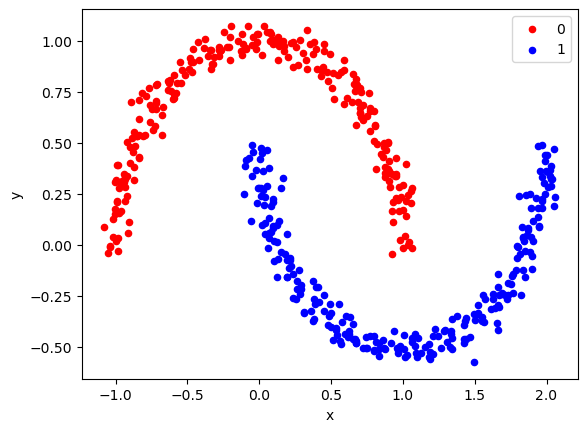

In [2]:
X, y = make_moons(n_samples=500, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))

colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

In [3]:
import torch
from torch import nn
import torch.optim as optim

In [4]:
# Vanilla Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.Sigmoid(),
            nn.Linear(8, 8),
            nn.Sigmoid(),
            nn.Linear(8, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        logits = self.model(x)

        return logits

In [5]:
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=8, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [6]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)

In [7]:
# Convert test data in numpy array to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32, requires_grad = False)
y_train_t = torch.tensor(y_train, dtype=torch.float32, requires_grad = False)

y_train_t = y_train_t.unsqueeze(1)

In [8]:
# Training loop
n_epochs = 150
for epoch in range(n_epochs):
    
    # Forward pass
    y_pred = model.forward(X_train_t)
    
    loss = criterion(y_pred, y_train_t)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Evaluation
    print(loss)
    

tensor(0.6998, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.8000, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6926, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6740, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6574, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6146, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5602, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4979, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4362, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3866, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3531, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3326, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3187, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3062, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2832, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2740, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2649, grad_fn=<Bina

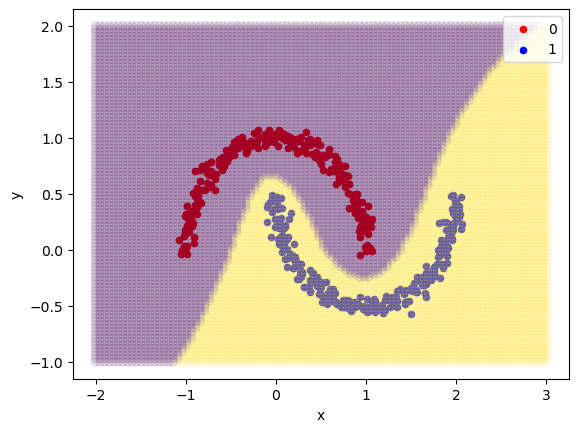

In [9]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model.forward(torch.tensor([x,y], dtype=torch.float32)) > 0.8 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()
